<div align="center">
  <h1>Diabetes Prediction</h1>
</div>



In [ ]:
#%pip install --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0

#!pip install --upgrade scikit-learn imbalanced-learn

#%pip uninstall scikit-learn imbalanced-learn -y
#!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

#%pip install scikit-learn imbalanced-learn pandas matplotlib seaborn xgboost lightgbm catboost
%pip install pandas scikit-learn


In [ ]:

import pandas as pd  # ✅ Recommended

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset for Diabetes
df = pd.read_csv('diabetes.csv')

# Split into features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recombine features and target for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_df.to_csv('diabetes_train.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)


In [ ]:
# Load the training and test datasets
diabetesTrain = pd.read_csv('diabetes_train.csv')
diabetesTest = pd.read_csv('diabetes_test.csv')
diabetesTrain.shape, diabetesTest.shape # ((2460, 9), (308, 9))
df = diabetesTrain.copy()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              2       84              0              0        0   0.0   
1              9      112             82             24        0  28.2   
2              1      139             46             19       83  28.7   
3              0      161             50              0        0  21.9   
4              6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
609            5      139             64             35      140  28.6   
610            1       96            122              0        0  22.4   
611           10      101             86             37        0  45.6   
612            0      141              0              0        0  42.4   
613            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.304   2

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

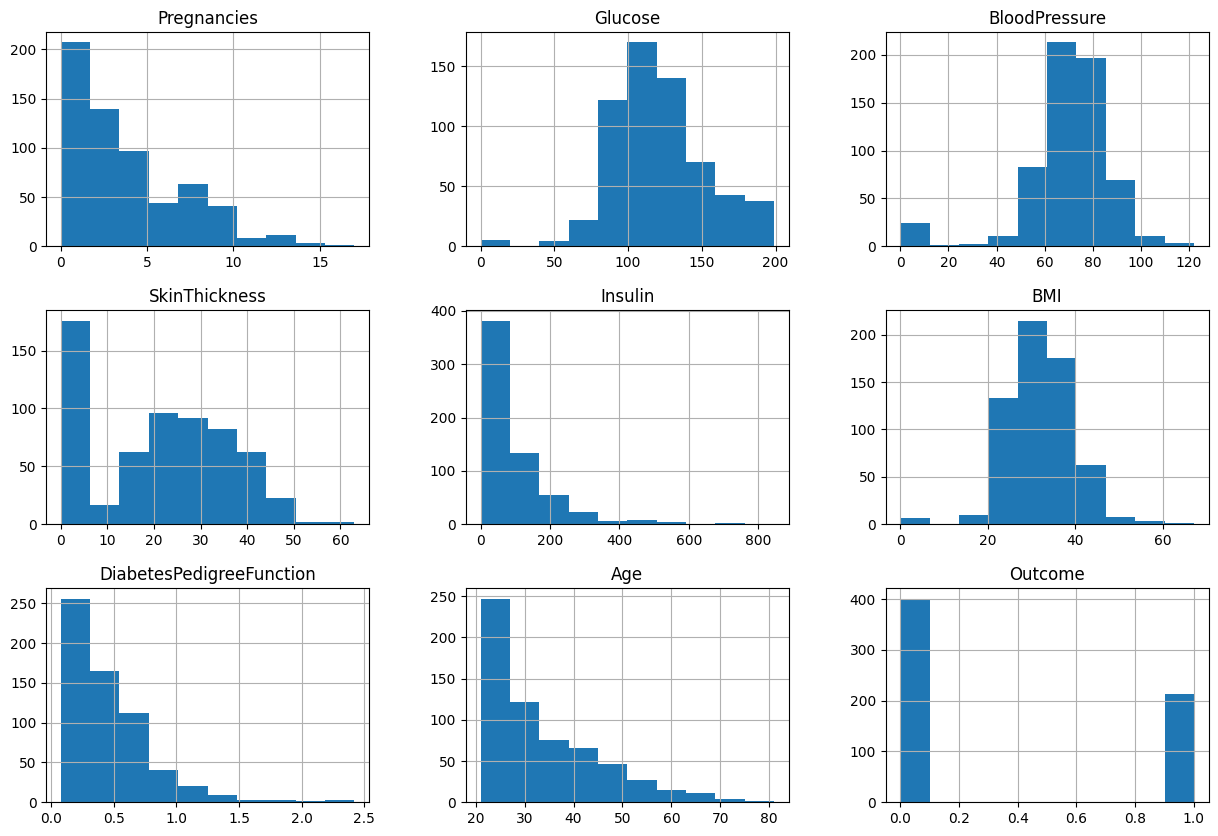

In [8]:
df.hist(figsize=(15, 10))

In [9]:
sample_y = df['Outcome']
sample_X = df.drop(columns='Outcome')
from sklearn.model_selection import train_test_split
sampleXtrain, sampleXtest, sampleytrain, sampleytest = train_test_split(sample_X, sample_y, random_state=84)

In [ ]:
#Decision Tree Classifier   
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(sampleXtrain, sampleytrain)
dtc_prediction = dtc.predict(sampleXtest)
from sklearn.metrics import accuracy_score
dtc_accuracy = accuracy_score(sampleytest, dtc_prediction)
dtc_accuracy 

0.7077922077922078

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(sampleXtrain, sampleytrain)
rfc_prediction = rfc.predict(X)
rfc_score = accuracy_score(y, rfc_prediction)
rfc_score 

0.8997395833333334

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter grid

param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}
# Instantiate the random forest classifier
rf = RandomForestClassifier()
# Instantiate the grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(sampleXtrain, sampleytrain)
# Get the best parameters
best_params = grid_search.best_params_
best_params


In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc_updated = RandomForestClassifier(max_depth=20,min_samples_leaf=4,min_samples_split=10,n_estimators=100)
rfc_updated.fit(sampleXtrain, sampleytrain)
rfc_updated_prediction = rfc_updated.predict(X)
rfc_updated_score = accuracy_score(y, rfc_updated_prediction)
rfc_updated_score

0.8528645833333334

#### The random forest without the parameter was far better. I need to learn how to tune these models well.